<h1>How can we control the increasing number of accidents in New York?</h1>

In [520]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

<h2>Introduction</h2>

<p><strong>Business Context.</strong> The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). </p>
<p>The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.</p>

<p><strong>Business Problem.</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Fetching the relevant data</h2>

<p>The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>

<h3>Question :</h3>
<p>Use the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary.</p>

**Answer.**

In [521]:
js = json.load(open('data/borough_data.json'))
js

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

-------

<h3>Question :</h3>
<p>Similarly, use the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. Name this DataFrame <code>df</code>. </p>

**Answer.**

In [522]:
df = pd.read_csv('data/accidents.csv',delimiter=';')
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
5,08/20/2019,7:15,QUEENS,11354.0,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4191802,Sedan,NaN,NaN,NaN,NaN
6,08/19/2019,12:00,QUEENS,11422.0,40.669327,-73.735330,241 STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4191196,Sedan,Sedan,NaN,NaN,NaN
7,09/22/2018,11:25,BRONX,10465.0,40.836227,-73.822920,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4004118,Sedan,NaN,NaN,NaN,NaN
8,09/22/2018,15:56,BRONX,10451.0,40.819298,-73.921880,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3985745,Sedan,NaN,NaN,NaN,NaN
9,08/18/2019,12:43,BRONX,10451.0,NaN,NaN,EAST 149 STREET,0,0,0,...,Passing Too Closely,NaN,NaN,NaN,4191092,Sedan,Sedan,NaN,NaN,NaN


-------

<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [523]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<h3>Exercise 1 :</h3>
<p>Since 2014, New York City has been implementing a road safety plan named <a href="https://www1.nyc.gov/content/visionzero/pages/">Vision Zero</a>. It aims to reduce the number of traffic deaths to <em>zero</em> by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:</p>
<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[x] Road safety audits at high risk locations</li>
<li>[x] Expansion in the cycle track network</li>
<li>[ ] Targeted education and awareness initiatives</li>
<li>[x] Creation of pedestrian refuge islands</li>
<li>[ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>
<p>Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.</p>
<p><strong>Note:</strong> You can create check marks by double-clicking this cell and adding an <code>[x]</code> in the corresponding lines. </p>

**Answer.**

<li>[x] Road safety audits at high risk locations</li>
<li>[x] Expansion in the cycle track network</li>
<li>[x] Creation of pedestrian refuge islands</li>

-------

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>

<h3>Exercise 2 :</h3>
<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>
<p><strong>Hint</strong>: You may find the pandas functions <code>to_datetime()</code> and <code>dt.to_period()</code> useful.</p>

**Answer.**

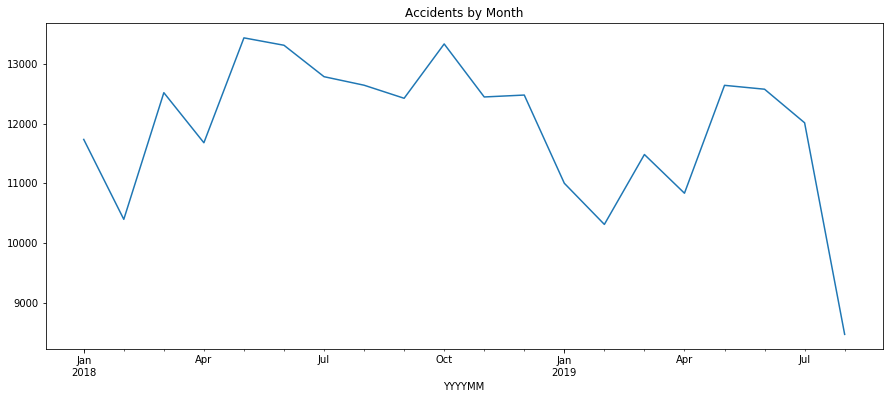

In [524]:
df["YYYYMM"] = pd.to_datetime(df["DATE"], format="%m/%d/%Y").dt.to_period("M")
df.groupby('YYYYMM')['COLLISION_ID'].count().plot(figsize=(15, 6),title='Accidents by Month')

**The line plot shows a zig-zag trend over time. We can see that August 2019 has the lowest number of accidents of all time. If we make the comparison between January 2018 and August 2019, we see that accidents have decreased.**

-------

<h3>Exercise 3 :</h3>
<p>From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?</p>

**Answer.**

**February and April seem to have the lowest number of accidents in both years. A kind of seasonality seems to be present in these months, possibly this behavior responds to a lower flow of motorcyclists, cyclists and pedestrians, or this could also be a consequence of the transition between two seasons, because February and April belong to different seasons.** 

-------

<h3>Exercise 4 :</h3>
<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.hour</code> useful. </p>

**Answer.**

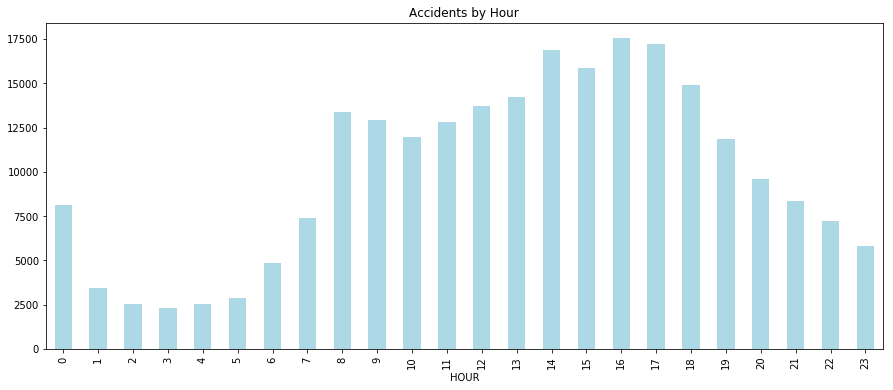

In [525]:
df["HOUR"] = pd.to_datetime(df["TIME"], format="%H:%M").dt.hour

df.groupby('HOUR')['COLLISION_ID'].count().plot.bar(figsize=(15, 6),title='Accidents by Hour',color='lightblue')
# plt.xticks(numpy.arange(0, 24, 1.0))

**The above bar graph shows us that the early morning hours (1 AM - 7 AM) are the hours with the least amount of accidents. However, from 8 AM the trend changes, leading to an increase in the number of accidents for the following hours of the day. 
It is also noteworthy that in the afternoon (2 PM - 6 PM) there are the highest numbers of accidents during the day.**

-------

<p>From this, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>

<h3>Exercise 5 :</h3>
<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>

**Answer.**

**This approach makes a generalization for each place and date, this means that exactly the same pattern will be repeated regardless of the date and place.  Firstly, there are dates that belong to different seasons of the year, so behavior can change accordingly, and secondly, each place has different conditions such as the signaling system, the structure of roads, etc. This details can define better decisions, because according to each season (date) or location, the client can implement specific actions and restrictions that respond to the dynamics of these variables.**

-------

<h3>Exercise 6 :</h3>
<p>How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.weekday</code> useful.</p>

**Answer.**

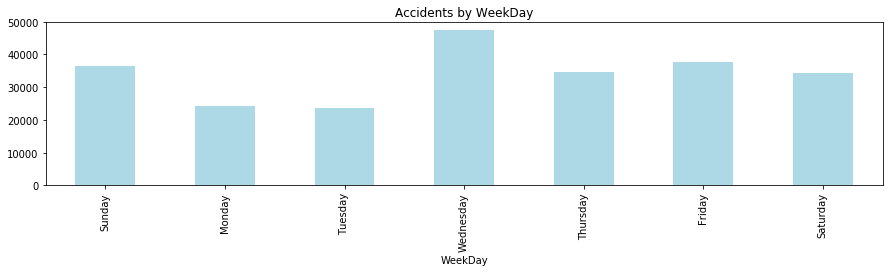

In [526]:
import calendar as ca

# Assign the Weekday index, between 0 and 6 using Lambda expression.
df["WeekDay"] = df["YYYYMM"].apply(lambda x: x.weekday)
# Get the Weekday name using the calendar library using Lambda expression.
df["WeekDay"] = df["WeekDay"].apply(lambda x: ca.day_name[x])
# Make a list of the Day Names in order
day_list = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#Plot the Weekdays with the correct order
df.groupby('WeekDay')['COLLISION_ID'].count().reindex(day_list).plot.bar(figsize=(15, 3),title='Accidents by WeekDay',color='lightblue')

**From the previous bar graph it can be concluded that in the middle of the week (Wednesdays) the highest number of accidents is presented, it is important to highlight that on Mondays and Tuesdays, the lowest numbers of these events are presented.**

-------

<h3>Exercise 7 :</h3>
<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>
<p><strong>Hint:</strong> You may want to update some of the keys in the borough dictionary to match the names in the dataframe. </p>

**Answer.**

,Number of Accidents,Area,Accidents per square mile
BOROUGH,,,
BRONX,37709,42.10,895.700713
BROOKLYN,76253,70.82,1076.715617
MANHATTAN,48749,22.83,2135.304424
QUEENS,67120,108.53,618.446512
STATEN ISLAND,8691,58.37,148.894980


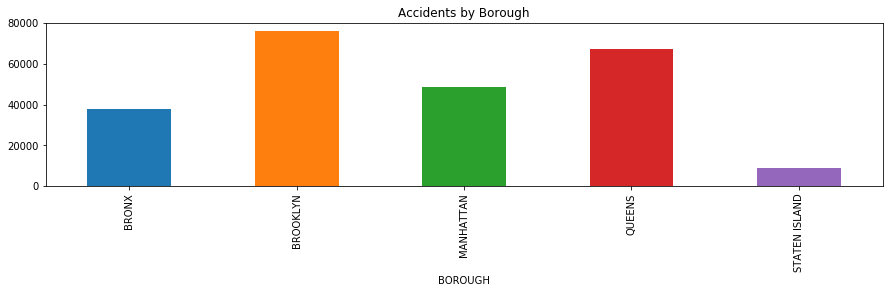

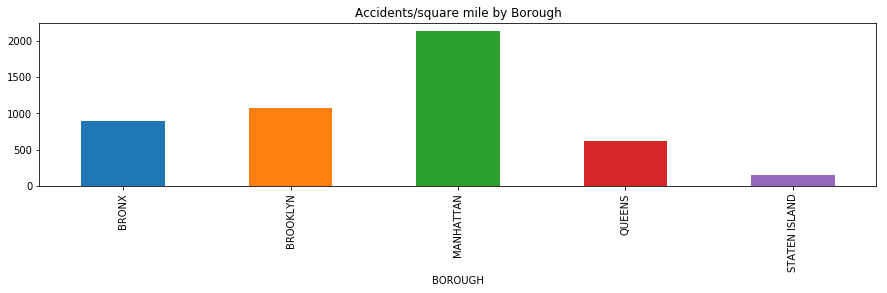

In [527]:
fig, ax = plt.subplots(figsize=(15, 3))
df.groupby('BOROUGH')['COLLISION_ID'].count().plot.bar(ax=ax,title='Accidents by Borough')

# 'Dictionary Comprehension' to change the Key_Names to Uppercase format and We replace the Key Name "the bronx" by "BRONX"
js = {"BRONX" if key=="the bronx" else key.upper(): value for key, value in js.items()}
# Grouping
agg_df = df.groupby('BOROUGH').agg({'COLLISION_ID': ['count']})
# Change name of the last column
agg_df.columns = ['Number of Accidents']
# 'Dictionary Comprehension' to create another Dictionary that contains the Borough and its area.
borough_dict = {key: value['area'] for key, value in js.items()}
# Create a borough_df to store borough_information
borough_df = pd.DataFrame(list(borough_dict.items()), columns=['BOROUGH', 'Area'])
# Set the borough as index for join purpose
borough_df = borough_df.set_index('BOROUGH')
# Join based with the BOROUGH Index from both Dataframes
agg_df = pd.merge(agg_df, borough_df, how='inner', on="BOROUGH")
# A new column that stores Accidents/square mile
agg_df['Accidents per square mile'] = agg_df['Number of Accidents'] / agg_df['Area']

fig, ax = plt.subplots(figsize=(15, 3))
agg_df['Accidents per square mile'].plot.bar(ax=ax,title='Accidents/square mile by Borough')
agg_df

**From the first bar graph we see that Brooklyn is the Borough with the highest number of accidents, but by showing the comparison in the second bar graph regarding to the accidents per area rate, we see that Manhattan has the highest proportion. Finally, Staten Island remains on both bar charts as the Borough with the lowest number of accidents and the lowest accidents/area rate.**

-------

<h3>Exercise 8 :</h3>
<p>Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.</p>
<p><strong>Hint:</strong> You can use <code>sns.FacetGrid</code> to create a grid of plots with the hourly data of each borough. </p>

**Answer.**

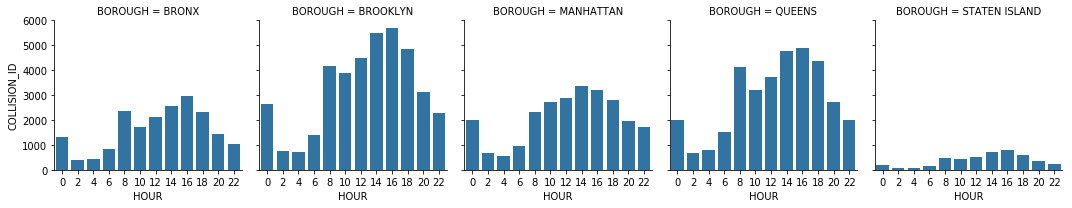

In [528]:
group_by_borough_hour_df = df.groupby(['BOROUGH', 'HOUR']).agg({'COLLISION_ID': ['count']})
group_by_borough_hour_df = pd.DataFrame(group_by_borough_hour_df)
group_by_borough_hour_df = group_by_borough_hour_df.reset_index()
g = sns.FacetGrid(group_by_borough_hour_df, col='BOROUGH')
g.map(sns.barplot, 'HOUR', 'COLLISION_ID', order=numpy.arange(0, 24, 2))

**We can conclude that apparently the afternoon strip, around 2 PM - 6 PM, is where most accidents are concentrated for most of the Boroughs.**

-------

<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

<h3>Exercise 9: (Optional - not required in submission)</h3>
<p>What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. </p>
<p><strong>Hint:</strong> One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions <code>pd.concat()</code> and  <code>reset_index()</code>. Then, use an appropiate <code>group_by</code> to count the number of repetitions of contributed factors per accident.   </p>

**Answer.**

,Number of Accidents
CONTRIBUTING FACTOR,
Unspecified,145122
Driver Inattention/Distraction,51364
Failure to Yield Right-of-Way,18870
Following Too Closely,16710
Backing Unsafely,14602
Passing Too Closely,11884
Passing or Lane Usage Improper,10669
Other Vehicular,6753
Turning Improperly,6454


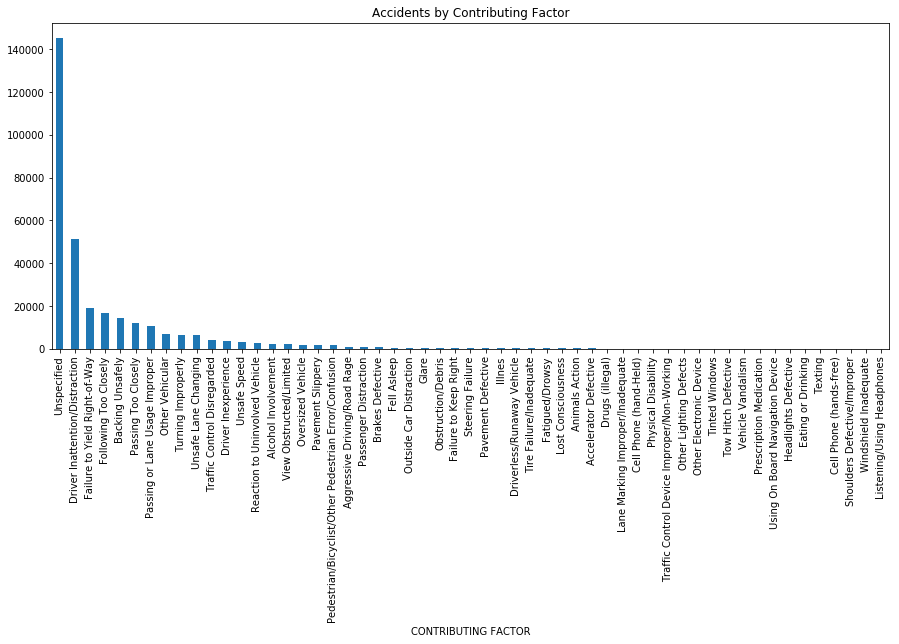

In [529]:
df1 = df[['COLLISION_ID','CONTRIBUTING FACTOR VEHICLE 1']]
# Rename the last column of Contribution for convenience in the concat
df1.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1':'CONTRIBUTING FACTOR'}, inplace = True) 

df2 = df[['COLLISION_ID','CONTRIBUTING FACTOR VEHICLE 2']]
# Rename the last column of Contribution for convenience in the concat
df2.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 2':'CONTRIBUTING FACTOR'}, inplace = True)

df3 = df[['COLLISION_ID','CONTRIBUTING FACTOR VEHICLE 3']]
# Rename the last column of Contribution for convenience in the concat
df3.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 3':'CONTRIBUTING FACTOR'}, inplace = True)

df4 = df[['COLLISION_ID','CONTRIBUTING FACTOR VEHICLE 4']]
# Rename the last column of Contribution for convenience in the concat
df4.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 4':'CONTRIBUTING FACTOR'}, inplace = True)

df5 = df[['COLLISION_ID','CONTRIBUTING FACTOR VEHICLE 5']]
# Rename the last column of Contribution for convenience in the concat
df5.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 5':'CONTRIBUTING FACTOR'}, inplace = True)

# Make the concat with the five dataframes
final_contribution_df = pd.concat([df1, df2, df3, df4, df5])

# Remove NaN values
final_contribution_df = final_df.dropna()

# Remove duplicate rows
final_contribution_df = final_contribution_df.drop_duplicates(subset=['COLLISION_ID', 'CONTRIBUTING FACTOR'], keep='first')
final_contribution_df = final_contribution_df.reset_index(drop=True)

# Store the groupby
contribution_factor_group_df = final_contribution_df.groupby('CONTRIBUTING FACTOR').agg({'COLLISION_ID': ['count']})

# Change name of the last column
contribution_factor_group_df.columns = ['Number of Accidents']

# Order by Number of accidents 
contribution_factor_group_df = contribution_factor_group_df.sort_values("Number of Accidents", ascending=False)

contribution_factor_group_df.plot.bar(figsize=(15, 6),title='Accidents by Contributing Factor',legend=None)

contribution_factor_group_df

**Ans: Excluding the Unspecified contribution factors, we see that Driver Inattention / Distraction, Failure to Yield Right-of-Way, and Following Too Closely, are the contribution factors that make up the top 3 most recurrent accidents**

-------

<h3>Exercise 10: (Optional - not required in submission)</h3>
<p>Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. </p>
<p><strong>Hint:</strong> You can apply a similar approach to the one used in the previous question.</p>

**Answer.**

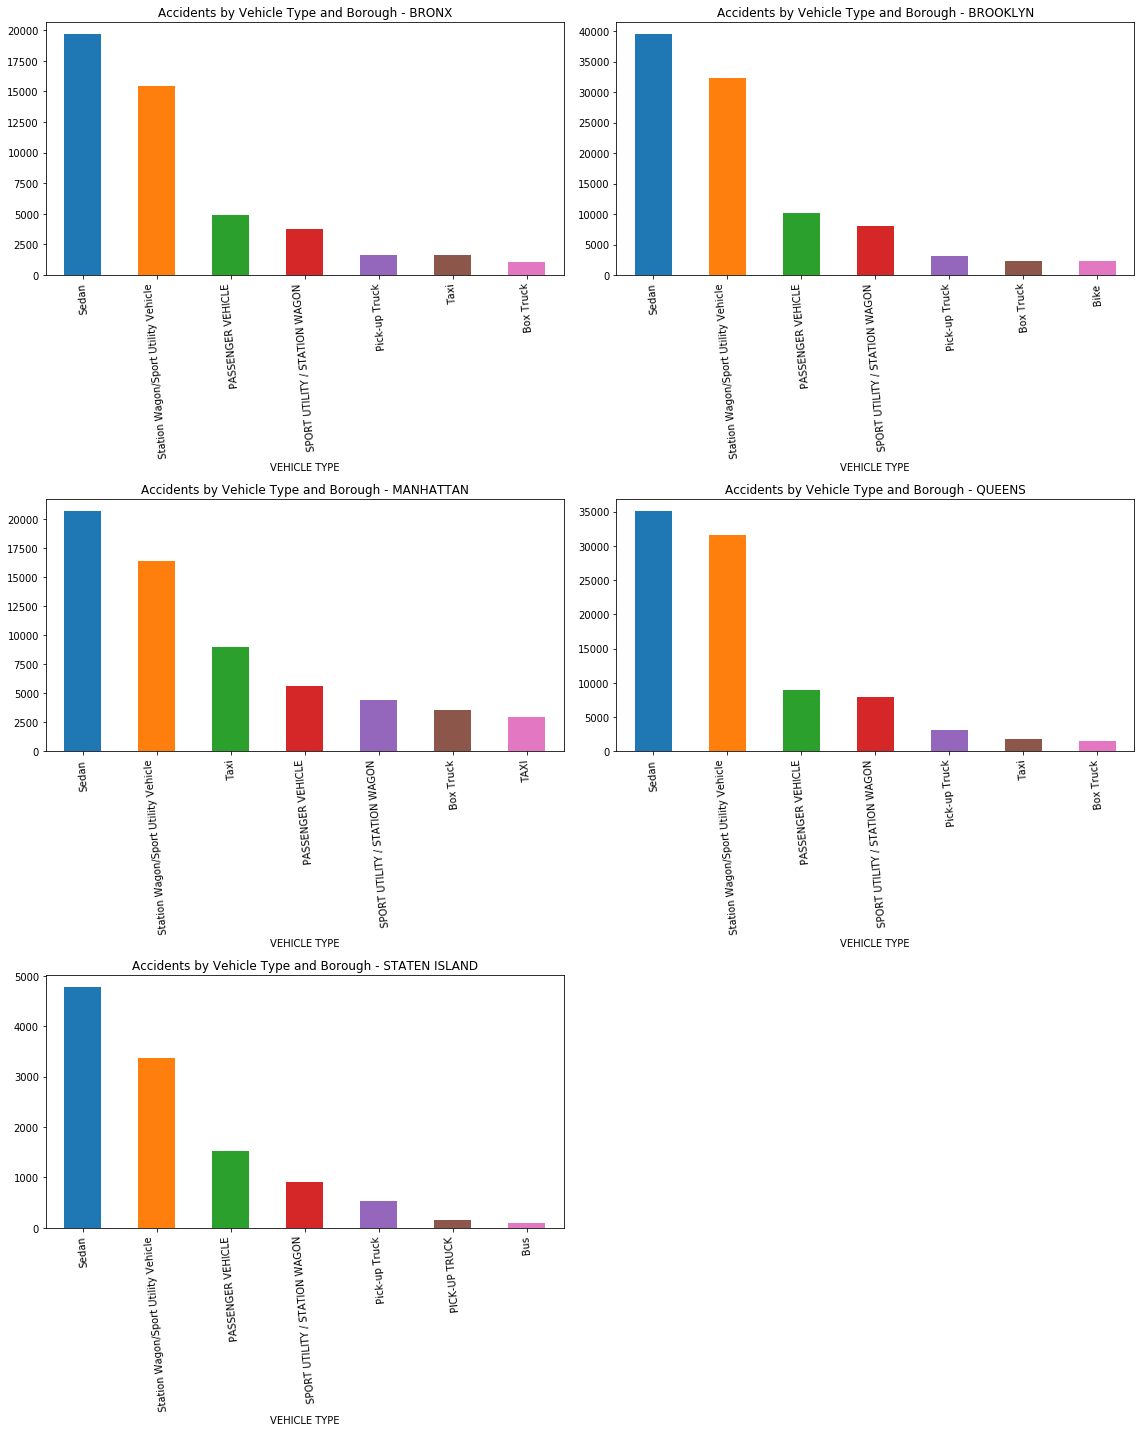

,BOROUGH,VEHICLE TYPE,Number of Accidents
0,BRONX,Sedan,19652
1,BRONX,Station Wagon/Sport Utility Vehicle,15434
2,BRONX,PASSENGER VEHICLE,4941
3,BRONX,SPORT UTILITY / STATION WAGON,3751
4,BRONX,Pick-up Truck,1670
5,BRONX,Taxi,1623
6,BRONX,Box Truck,1098
7,BROOKLYN,Sedan,39459
8,BROOKLYN,Station Wagon/Sport Utility Vehicle,32262
9,BROOKLYN,PASSENGER VEHICLE,10177


In [530]:
df6 = df[['COLLISION_ID','VEHICLE TYPE CODE 1','BOROUGH']]
# Rename the last column of Vehicle Type for convenience in the concat
df6.rename(columns = {'VEHICLE TYPE CODE 1':'VEHICLE TYPE'}, inplace = True) 

df7 = df[['COLLISION_ID','VEHICLE TYPE CODE 2','BOROUGH']]
# Rename the last column of Vehicle Type for convenience in the concat
df7.rename(columns = {'VEHICLE TYPE CODE 2':'VEHICLE TYPE'}, inplace = True)

df8 = df[['COLLISION_ID','VEHICLE TYPE CODE 3','BOROUGH']]
# Rename the last column of Vehicle Type for convenience in the concat
df8.rename(columns = {'VEHICLE TYPE CODE 3':'VEHICLE TYPE'}, inplace = True)

df9 = df[['COLLISION_ID','VEHICLE TYPE CODE 4','BOROUGH']]
# Rename the last column of Vehicle Type for convenience in the concat
df9.rename(columns = {'VEHICLE TYPE CODE 4':'VEHICLE TYPE'}, inplace = True)

df10 = df[['COLLISION_ID','VEHICLE TYPE CODE 5','BOROUGH']]
# Rename the last column of Vehicle Type for convenience in the concat
df10.rename(columns = {'VEHICLE TYPE CODE 5':'VEHICLE TYPE'}, inplace = True)

# Make the concat with the five dataframes
final_vehicle_df = pd.concat([df6, df7, df8, df9, df10])

# Remove NaN values
final_vehicle_df = final_vehicle_df.dropna()

# Remove duplicate rows
final_vehicle_df = final_vehicle_df.drop_duplicates(subset=['COLLISION_ID', 'VEHICLE TYPE'], keep='first')
final_vehicle_df = final_vehicle_df.reset_index(drop=True)

# Store the groups by BOROUGH and VEHICLE TYPE
vehicle_type_group_df = final_vehicle_df.groupby(['BOROUGH','VEHICLE TYPE']).agg({'COLLISION_ID': ['count']})

# Change name of the last column
vehicle_type_group_df.columns = ['Number of Accidents']

# Order by Number of accidents
vehicle_type_group_df = vehicle_type_group_df.sort_values(['BOROUGH','Number of Accidents'], ascending=[True,False])

# Store Top 7 of Vehicles Types by BOROUGH
top_10_largest_vehicle_type_accidents_per_borough = vehicle_type_group_df.groupby('BOROUGH').head(7)

top_10_largest_vehicle_type_accidents_per_borough = pd.DataFrame(top_10_largest_vehicle_type_accidents_per_borough)
top_10_largest_vehicle_type_accidents_per_borough = top_10_largest_vehicle_type_accidents_per_borough.reset_index()
      
fig = plt.figure(figsize=(16, 20))
i = 1
for borough, group in top_10_largest_vehicle_type_accidents_per_borough.groupby('BOROUGH'):
    ax = fig.add_subplot(3, 2, i)
    i += 1
    group.plot.bar(x='VEHICLE TYPE', y = 'Number of Accidents', ax=ax, legend=False)
    ax.set_title('Accidents by Vehicle Type and Borough - ' + borough)
    plt.xticks(rotation=95)

plt.tight_layout()
plt.show()     

top_10_largest_vehicle_type_accidents_per_borough

**We see that in most of the accidents of each Borough are involved vehicles of type Sedan, Station Wagon/Sport Utility Vehicle, and PASSENGER VEHICLE.**

-------

<h3>Exercise 11:</h3>
<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[x] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[ ] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[ ] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Answer.**

<p>[x] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>

I would calculate a death/accident rate and an injury/accident rate for the first quarters of 2018 and 2019, and if more detail is needed, these same rates would be calculated for cyclists and pedestrians. Once I have everything calculated, I can compare the corresponding rates in the first quarters of both years, and from there, I would make some conclusions. 
According to the results of the analysis, I would recommend to the client to take actions and implement restrictions according to the critical level, these measures would be from pedagogical, of pursuit, and in a greater scope, respective to the adjustment of the spaces, which would include campaigns, better systems of signaling, extension of the spaces for pedestrians and cyclists.

-------

<h3>Exercise 12: (Optional - not required in submission)</h3>
<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>
<p><strong>For example,</strong> if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.</p>
<p><strong>Hint:</strong> You may want to create a new column with the total number of kills in the accident. For that you may find the function <code>.to_numpy()</code> useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. </p>

**Answer.**

,% of Deaths Incidence
VEHICLE TYPE,
Station Wagon/Sport Utility Vehicle,27.9
Sedan,20.8
Motorcycle,7.1
PASSENGER VEHICLE,6.7
SPORT UTILITY / STATION WAGON,6.4
Bike,6.1
Bus,3.2


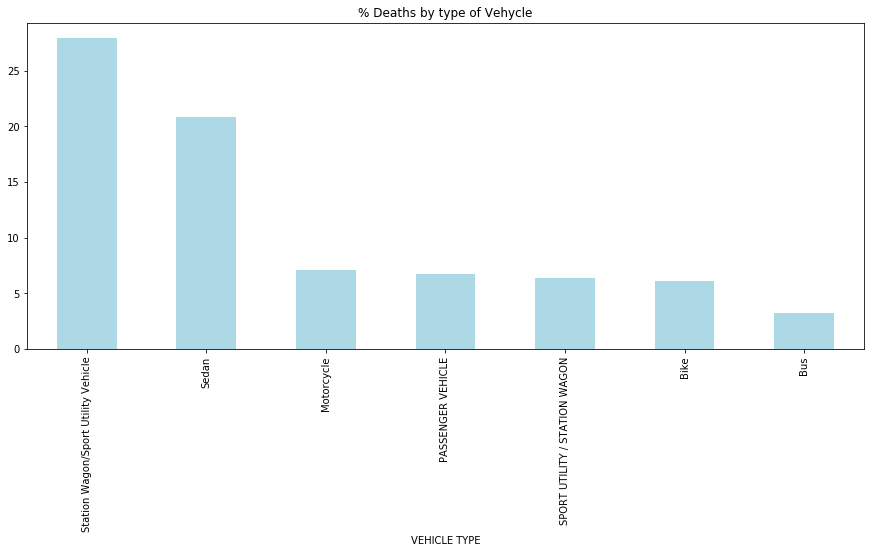

In [531]:
df11 = df[['COLLISION_ID','VEHICLE TYPE CODE 1','BOROUGH','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]
# Rename the last column of Vehicle Type for convenience in the concat
df11.rename(columns = {'VEHICLE TYPE CODE 1':'VEHICLE TYPE'}, inplace = True) 

df12 = df[['COLLISION_ID','VEHICLE TYPE CODE 2','BOROUGH','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]
# Rename the last column of Vehicle Type for convenience in the concat
df12.rename(columns = {'VEHICLE TYPE CODE 2':'VEHICLE TYPE'}, inplace = True)

df13 = df[['COLLISION_ID','VEHICLE TYPE CODE 3','BOROUGH','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]
# Rename the last column of Vehicle Type for convenience in the concat
df13.rename(columns = {'VEHICLE TYPE CODE 3':'VEHICLE TYPE'}, inplace = True)

df14 = df[['COLLISION_ID','VEHICLE TYPE CODE 4','BOROUGH','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]
# Rename the last column of Vehicle Type for convenience in the concat
df14.rename(columns = {'VEHICLE TYPE CODE 4':'VEHICLE TYPE'}, inplace = True)

df15 = df[['COLLISION_ID','VEHICLE TYPE CODE 5','BOROUGH','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]
# Rename the last column of Vehicle Type for convenience in the concat
df15.rename(columns = {'VEHICLE TYPE CODE 5':'VEHICLE TYPE'}, inplace = True)

# Make the concat with the five dataframes
final_vehicle_deaths_df = pd.concat([df11, df12, df13, df14, df15])

# Remove NaN values
final_vehicle_deaths_df = final_vehicle_deaths_df.dropna()

# Remove duplicate rows
final_vehicle_deaths_df = final_vehicle_deaths_df.drop_duplicates(subset=['COLLISION_ID', 'VEHICLE TYPE'], keep='first')
final_vehicle_deaths_df = final_vehicle_deaths_df.reset_index(drop=True)

# I couldn't use the .to_numpy() method, so I decided to create a numpy array, to make a sum between the three NUMBER OF "" KILLED
final_vehicle_deaths_df['TOTAL DEATHS'] = numpy.array(final_vehicle_deaths_df.iloc[:,3:6]).sum(axis=1)

# Group by and calculate the percentaje of deaths by VEHICLE TYPE
vehicle_type__deaths_group_df = final_vehicle_deaths_df.groupby('VEHICLE TYPE').agg({'TOTAL DEATHS': ['sum']}).apply(lambda x: round(x * 100 / float(x.sum()),1))

# Change name of the last column
vehicle_type__deaths_group_df.columns = ['% of Deaths Incidence']

# Order by Number of accidents
vehicle_type__deaths_group_df = vehicle_type__deaths_group_df.sort_values('% of Deaths Incidence', ascending=False)

# Plot Top 7 of Vehicles Types by % of deaths
vehicle_type__deaths_group_df.head(7).plot.bar(figsize=(15, 6),title='% Deaths by type of Vehycle',legend=None,color='lightblue')
vehicle_type__deaths_group_df.head(7)

# final_vehicle_deaths_df[(final_vehicle_deaths_df["COLLISION_ID"] == 4116545)]


**We see that the proportions of deaths are concentrated in Station Wagon/Sport Utility Vehicle, Sedan, motorcycle, and PASSENGER VEHICLE types, adding a percentage of 62.5% among these 4 categories within the total deaths.**

-------